**Part 0: Importation and preprocessing**
------------------------------------------

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
import seaborn as sns
from IPython.display import display
pd.options.mode.chained_assignment = None
import matplotlib
matplotlib.style.use('ggplot')

#Getting data
tweets = pd.read_csv('../input/demonetization-tweets.csv', encoding = "latin1")
display(tweets.head(3))


,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False


In [2]:
import re
#Preprocessing del RT @blablabla:
tweets['text_new'] = ''
tweets['tweetos'] = '' 

#add tweetos first part
for i in range(len(tweets['text'])):
    try:
        tweets['tweetos'][i] = tweets['text'].str.split(':')[i][0]
    except AttributeError:    
        tweets['tweetos'][i] = 'other'

#Preprocessing tweetos. select tweetos contains 'RT @'
for i in range(len(tweets['text'])):
    if tweets['tweetos'].str.contains('RT @')[i]  == False:
        tweets['tweetos'][i] = 'other'

#'text_new' is the feature 'text' without the tweetos    
for i in range(len(tweets['text'])):
    m = re.search('(?<=:)(.*)', tweets['text'][i])
    if tweets['text'].str.contains('RT @')[i]  == True:
        try:
            tweets['text_new'][i]=m.group(0)
        except AttributeError:
            tweets['text_new'][i]=tweets['text'][i] 
    else:       
        tweets['text_new'][i] =  tweets['text'][i]       

In [3]:
#tweets['text_new_bis'] = tweets['text_new'].str.contains(r'^https?:\/\/.*[\r\n]*')
#for i in range(len(tweets['text'])):
#    m =  re.split('https', tweets['text_new'][i])
#    #tweets['text_new_bis'][i]
#    try:
#        print(m[1])
#    except IndexError:  
#        print('')
#print(tweets['text_new_bis'][0])
#print(tweets['text_new_bis'])
#print(tweets['text_new'][7999])
tweets1 = tweets.loc[0:7999]
tweets2 = tweets.loc[8000:]

In [43]:
tweets = tweets1  #Only for Nov
tweets = tweets2  #Only for Apr

**Part I: WordCloud**
---------------------

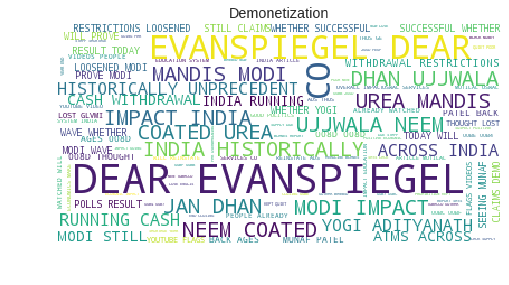

In [44]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordcloud_by_province(tweets):
    stopwords = set(STOPWORDS)
    stopwords.add("https")
    stopwords.add("00A0")
    stopwords.add("00BD")
    stopwords.add("00B8")
    stopwords.add("ed")
    stopwords.add("demonetization")
    stopwords.add("Demonetization co")
    #Narendra Modi is the Prime minister of India
    stopwords.add("lakh")
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets['text_new'].str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Demonetization")

wordcloud_by_province(tweets)  

**"Since terrorists"? "Narenda Modi"? Ok We must continue to investigate. I think that we must investigate the tweets with the words "terrorists" and "narendramodi" separately** 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


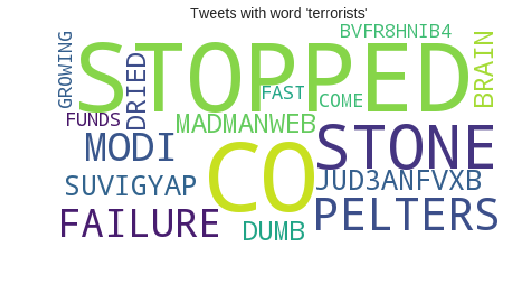

In [48]:
def wordcloud_by_province(tweets):
    a = pd.DataFrame(tweets['text'].str.contains("terrorists").astype(int))
    b = list(a[a['text']==1].index.values)
    stopwords = set(STOPWORDS)
    stopwords.add("https")
    stopwords.add("terrorists")
    stopwords.add("00A0")
    stopwords.add("00BD")
    stopwords.add("00B8")
    stopwords.add("ed")
    stopwords.add("demonetization")
    stopwords.add("Demonetization co")
    stopwords.add("lakh")
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets.ix[b,:]['text_new'].str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Tweets with word 'terrorists'")

wordcloud_by_province(tweets)  

**It is possible that The Demonitazation have a link with Kishtwar and the terrorist**

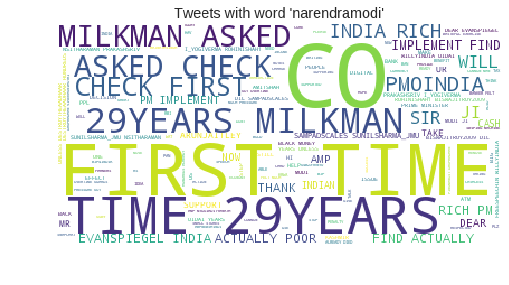

In [49]:
def wordcloud_by_province(tweets):
    a = pd.DataFrame(tweets['text'].str.contains("narendramodi").astype(int))
    b = list(a[a['text']==1].index.values)
    stopwords = set(STOPWORDS)
    stopwords.add("narendramodi")
    stopwords.add("https")
    stopwords.add("00A0")
    stopwords.add("00BD")
    stopwords.add("00B8")
    stopwords.add("ed")
    stopwords.add("demonetization")
    stopwords.add("Demonetization co")
    stopwords.add("lakh")
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets.ix[b,:]['text_new'].str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Tweets with word 'narendramodi'")

wordcloud_by_province(tweets)  

**I think that "PM" represents the word "Prime Minister".  The different tweets with narendramodi are supporting ?**

**Part II: Timeseries plotting**
--------------------------------

In [50]:
print(tweets['retweetCount'].describe())

count    6940.000000
mean      288.907781
std       521.102825
min         0.000000
25%         0.000000
50%        38.000000
75%       197.000000
max      5170.000000
Name: retweetCount, dtype: float64


In [51]:
tweets['nb_words'] = 0
for i in range(len(tweets['text'])):
    tweets['nb_words'][i] = len(tweets['text'][i].split(' '))

KeyError: 0

In [52]:
tweets['hour'] = pd.DatetimeIndex(tweets['created']).hour
tweets['date'] = pd.DatetimeIndex(tweets['created']).date
tweets['minute'] = pd.DatetimeIndex(tweets['created']).minute

In [53]:
tweets_hour = tweets.groupby(['hour'])['retweetCount'].sum()
tweets_minute = tweets.groupby(['minute'])['retweetCount'].sum()
tweets['text_len'] = tweets['text'].str.len()
tweets_avgtxt_hour = tweets.groupby(['hour'])['text_len'].mean()
tweets_avgwrd_hour = tweets.groupby(['hour'])['nb_words'].mean()

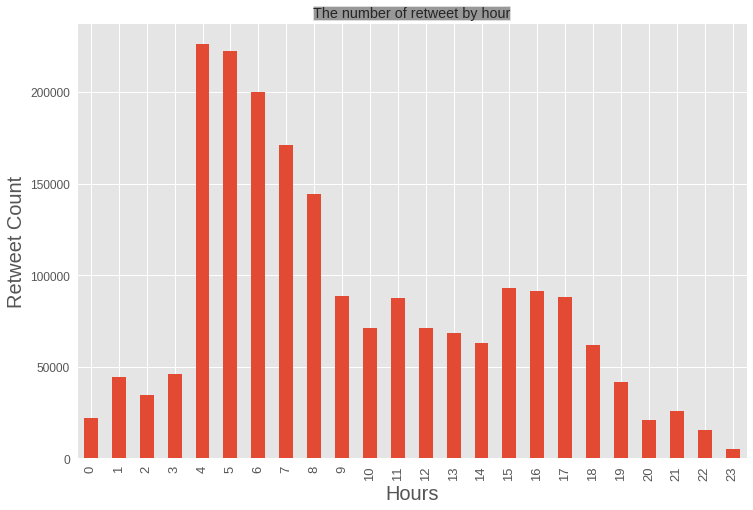

In [55]:
import seaborn as sns
tweets_hour.transpose().plot(kind='bar',figsize=(12, 8))
plt.xlabel('Hours')
plt.ylabel('Retweet Count')
plt.rc('xtick',labelsize=13)
plt.rc('ytick',labelsize=12)
plt.rc('axes',labelsize=20)

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The number of retweet by hour', bbox={'facecolor':'1.6', 'pad':0})



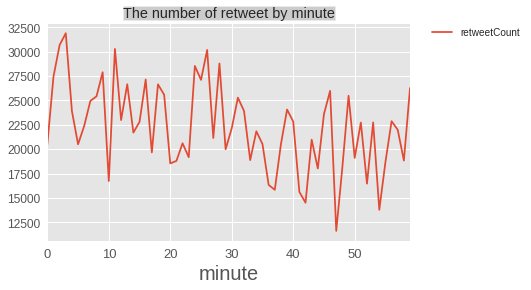

In [15]:
tweets_minute.transpose().plot(kind='line',figsize=(6.5, 4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The number of retweet by minute', bbox={'facecolor':'0.8', 'pad':0})

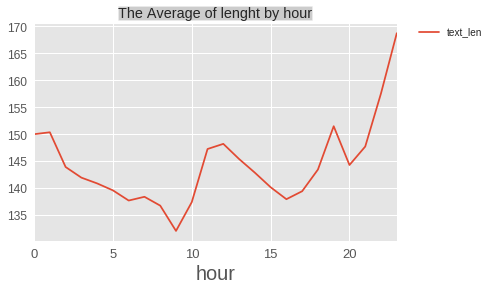

In [16]:
tweets_avgtxt_hour.transpose().plot(kind='line',figsize=(6.5, 4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The Average of lenght by hour', bbox={'facecolor':'0.8', 'pad':0})

In [ ]:
tweets_avgwrd_hour.transpose().plot(kind='line',figsize=(6.5, 4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The Average number of words by hour', bbox={'facecolor':'0.8', 'pad':0})

In [56]:
#print(get_corpus(tweets['text']))

In [57]:
def get_stop_words(s, n):
	'''
	:s : pd.Series; each element as a list of words from tokenization
	:n : int; n most frequent words are judged as stop words 

	:return : list; a list of stop words
	'''
	from collections import Counter
	l = get_corpus(s)
	l = [x for x in Counter(l).most_common(n)]
	return l

def get_corpus(s):
	'''
	:s : pd.Series; each element as a list of words from tokenization

	:return : list; corpus from s
	'''
	l = []
	s.map(lambda x: l.extend(x))
	return l

#freqwords = get_stop_words(tweets['text'],n=60)

#freq = [s[1] for s in freqwords]

#plt.title('frequency of top 60 most frequent words', bbox={'facecolor':'0.8', 'pad':0})
#plt.plot(freq)
#plt.xlim([-1,60])
#plt.ylim([0,1.1*max(freq)])
#plt.ylabel('frequency')
#plt.show()

**Part III: Source of tweets**
-----------------------

In [58]:
tweets['statusSource_new'] = ''

for i in range(len(tweets['statusSource'])):
    m = re.search('(?<=>)(.*)', tweets['statusSource'][i])
    try:
        tweets['statusSource_new'][i]=m.group(0)
    except AttributeError:
        tweets['statusSource_new'][i]=tweets['statusSource'][i]
        
#print(tweets['statusSource_new'].head())   

tweets['statusSource_new'] = tweets['statusSource_new'].str.replace('</a>', ' ', case=False)

KeyError: 0

In [59]:
tweets['statusSource_new'] = tweets['statusSource_new'].str.replace('</a>', ' ', case=False)
#print(tweets[['statusSource_new','retweetCount']])

tweets_by_type= tweets.groupby(['statusSource_new'])['retweetCount'].sum()
#print(tweets_by_type)

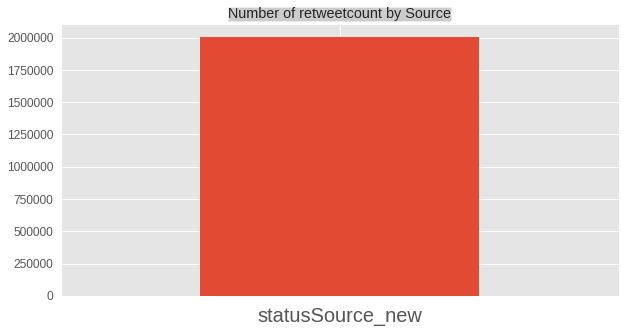

In [60]:
tweets_by_type.transpose().plot(kind='bar',figsize=(10, 5))
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Number of retweetcount by Source', bbox={'facecolor':'0.8', 'pad':0})

**Top 3 of Source: 1 - Twitter For Android 2 - Twitter Web Client and finally 3 - Twitter for Iphone !**

In [61]:
tweets['statusSource_new2'] = ''

for i in range(len(tweets['statusSource_new'])):
    if tweets['statusSource_new'][i] not in ['Twitter for Android ','Twitter Web Client ','Twitter for iPhone ']:
        tweets['statusSource_new2'][i] = 'Others'
    else:
        tweets['statusSource_new2'][i] = tweets['statusSource_new'][i] 
#print(tweets['statusSource_new2'])       

tweets_by_type2 = tweets.groupby(['statusSource_new2'])['retweetCount'].sum()

KeyError: 0

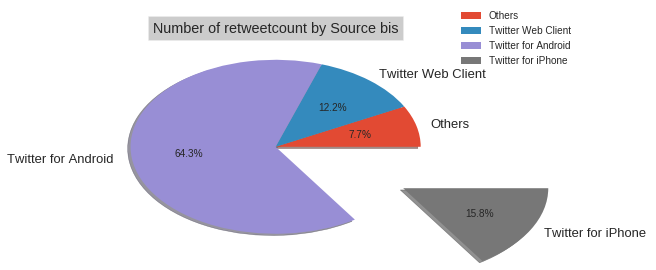

In [62]:
tweets_by_type2.rename("",inplace=True)
explode = (0, 0, 0, 1.0)
tweets_by_type2.transpose().plot(kind='pie',figsize=(6.5, 4),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=6, borderaxespad=0.)
plt.title('Number of retweetcount by Source bis', bbox={'facecolor':'0.8', 'pad':5})

**Part IV: Clustering with Kmeans**
--------------------------

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
####
from nltk.stem import WordNetLemmatizer
#tweets['text_sep'] = [''.join(z).strip() for z in tweets['text_new']]
tweets['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in tweets['text_new']]       
####
vectorizer = TfidfVectorizer(max_df=0.5,max_features=10000,min_df=10,stop_words='english',use_idf=True)
X = vectorizer.fit_transform(tweets['text_lem'].str.upper())
print(X.shape)
#print(tweets['text_sep'])
#print(tweets['text_new'])

(6940, 762)


In [64]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5,init='k-means++',max_iter=200,n_init=1)

In [65]:
km.fit(X)
terms = vectorizer.get_feature_names()
order_centroids = km.cluster_centers_.argsort()[:,::-1]
for i in range(5):
    print("cluster %d:" %i, end='')
    for ind in order_centroids[i,:10]:
        print(' %s' % terms[ind], end='')
    print()    

cluster 0: evanspiegel dear yt fe fingers financial finally filling ficn felt
cluster 1: https youtube india post modi people amp cash good money
cluster 2: positive far suspect overwhelming political elec economic impact going swift
cluster 3: india impact modi loosened restrictions withdrawal demo claims mandis urea
cluster 4: ed bd seeing ages glvmi munaf patel thought lost bc


**It is possible to to improve that. We must delete the words "https"092d" "00a0" etc...**

In [66]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pos = pca.fit_transform(dist)
xs, ys = pos[:,0], pos[:,1]

In [68]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}#, 5: '#8A2BE2', 6: '#E9967A'}
#8A2BE2
##E9967A
#set up cluster names using a dict
cluster_names = {0: 'cluster 1', 
                 1: 'cluster 2', 
                 2: 'cluster 3', 
                 3: 'cluster 4', 
                 4: 'cluster 5'}
                 #5: 'cluster 6',
                 #6: 'cluster 7'}
clusters = km.labels_.tolist()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


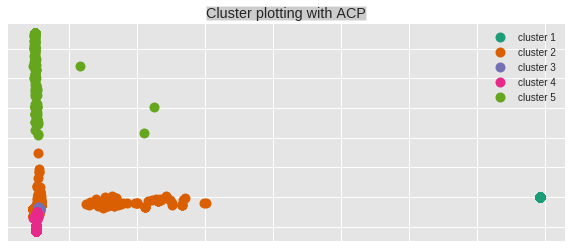

In [69]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title='')) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(10, 4)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=10, 
            label=cluster_names[name], color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point
plt.title('Cluster plotting with ACP', bbox={'facecolor':'0.8', 'pad':0})
#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=5)  

    
    
plt.show() #show the plot

**It is possible to display a title for each points. But in order to have something visible in this case it is not realized.**

**Part V: Correlation between numerical features**
--------------------------------------------------

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tweets['favorited'] = le.fit_transform(tweets['favorited'])
tweets['replyToSN'] = tweets['replyToSN'].fillna(-999)
tweets['truncated'] = le.fit_transform(tweets['truncated'])
tweets['replyToSID'] = tweets['replyToSID'].fillna(-999)
tweets['id'] = le.fit_transform(tweets['id'])
tweets['replyToUID'] = tweets['replyToUID'].fillna(-999)
tweets['statusSource_new'] = le.fit_transform(tweets['statusSource_new'])
tweets['isRetweet'] = le.fit_transform(tweets['isRetweet'])
tweets['retweeted'] = le.fit_transform(tweets['retweeted'])
tweets['screenName'] = le.fit_transform(tweets['screenName'])
tweets['tweetos'] = le.fit_transform(tweets['tweetos'])

tweets_num = tweets[tweets.select_dtypes(exclude=['object']).columns.values]
tweets_num.drop('Unnamed: 0',inplace=True,axis=1)
tweets_num.drop('retweeted',inplace=True,axis=1)
tweets_num.drop('favorited',inplace=True,axis=1)
print(tweets.select_dtypes(exclude=['object']).columns.values)

['Unnamed: 0' 'X' 'favorited' 'favoriteCount' 'truncated' 'replyToSID' 'id'
 'replyToUID' 'screenName' 'retweetCount' 'isRetweet' 'retweeted' 'tweetos'
 'nb_words' 'hour' 'minute' 'text_len' 'statusSource_new']


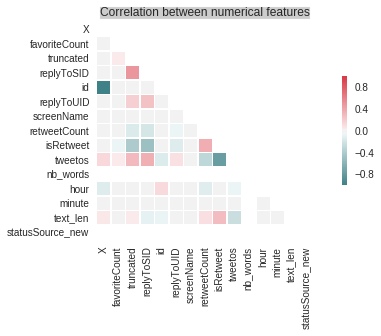

In [71]:
#from string import letters
import seaborn as sns

sns.set(style="white")
# Compute the correlation matrix
corr = tweets_num.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(920, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.title('Correlation between numerical features', bbox={'facecolor':'0.8', 'pad':0})

**Low correlation between numerical features (between 0.30 and -O.30)**

**Part VI: Sentiment Analysis**
-------------------------------

**This part is inspired by Priya Ananthram's scripts. You can look her work here:** https://www.kaggle.com/priyaananthram/d/arathee2/demonetization-in-india-twitter-data/sentiment-analysis-of-tweets

In [72]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

from nltk import tokenize

sid = SentimentIntensityAnalyzer()

tweets['sentiment_compound_polarity']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
tweets.head()


,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,...,minute,text_len,statusSource_new,statusSource_new2,text_lem,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
8000,8001,8001,RT @jamewils: @Memeghnad PAN duplicate argumen...,0,0,-999,2017-04-21 17:26:43,0,-999.0,6939,...,26,140,0,,Memeghnad PAN duplicate argument reminds me ex...,-0.3612,0.651,0.233,0.116,NEGATIVE
8001,8002,8002,RT @URautelaForever: Dear @evanspiegel \r\nInd...,0,0,-999,2017-04-21 17:17:04,0,-999.0,6938,...,17,140,0,,Dear evanspiegel,0.3818,0.278,0.000,0.722,POSITIVE
8002,8003,8003,"A few 'Experts' derided demonetization, claimi...",0,0,-999,2017-04-21 17:11:16,1,-999.0,6937,...,11,141,0,,A few Experts derided demonetization claimi...,-0.2023,0.909,0.091,0.000,NEGATIVE
8003,8004,8004,One idea for going cashless: Incentivize digit...,0,0,-999,2017-04-21 17:10:21,0,-999.0,6936,...,10,100,0,,One idea for going cashless Incentivize digit...,0.0000,1.000,0.000,0.000,NEUTRAL
8004,8005,8005,RT @jamewils: @Memeghnad PAN duplicate argumen...,0,0,-999,2017-04-21 17:04:38,0,-999.0,6935,...,4,140,0,,Memeghnad PAN duplicate argument reminds me ex...,-0.3612,0.651,0.233,0.116,NEGATIVE


In [ ]:
tweets.head()

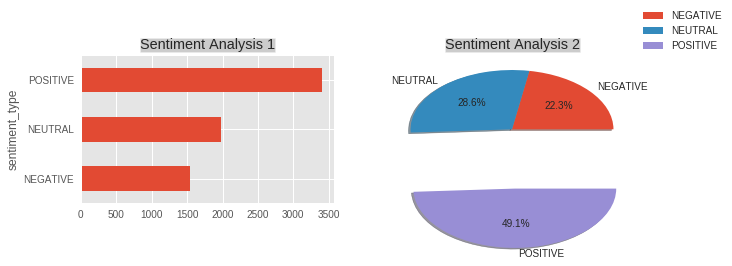

In [73]:
import matplotlib
matplotlib.style.use('ggplot')

tweets_sentiment = tweets.groupby(['sentiment_type'])['sentiment_neutral'].count()
tweets_sentiment.rename("",inplace=True)
explode = (0, 0, 1.0)
plt.subplot(221)
tweets_sentiment.transpose().plot(kind='barh',figsize=(10, 6))
plt.title('Sentiment Analysis 1', bbox={'facecolor':'0.8', 'pad':0})
plt.subplot(222)
tweets_sentiment.plot(kind='pie',figsize=(10, 6),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=3, borderaxespad=0.)
plt.title('Sentiment Analysis 2', bbox={'facecolor':'0.8', 'pad':0})
plt.show()

In [74]:
tweets['count'] = 1
tweets_filtered = tweets[['hour', 'sentiment_type', 'count']]
pivot_tweets = tweets_filtered.pivot_table(tweets_filtered, index=["sentiment_type", "hour"], aggfunc=np.sum)
print(pivot_tweets.head())

                     count
sentiment_type hour       
NEGATIVE       0        26
               1        44
               2        54
               3        96
               4        64


In [75]:
tweets_positive = tweets_filtered[tweets_filtered['sentiment_type'] == 'POSITIVE']
tweets_negative = tweets_filtered[tweets_filtered['sentiment_type'] == 'NEGATIVE']
tweets_neutral = tweets_filtered[tweets_filtered['sentiment_type'] == 'NEUTRAL']

tp_hours = tweets_positive.groupby(by = 'hour').sum()
tneg_hours = tweets_negative.groupby(by = 'hour').sum()
tneu_hours = tweets_neutral.groupby(by = 'hour').sum()

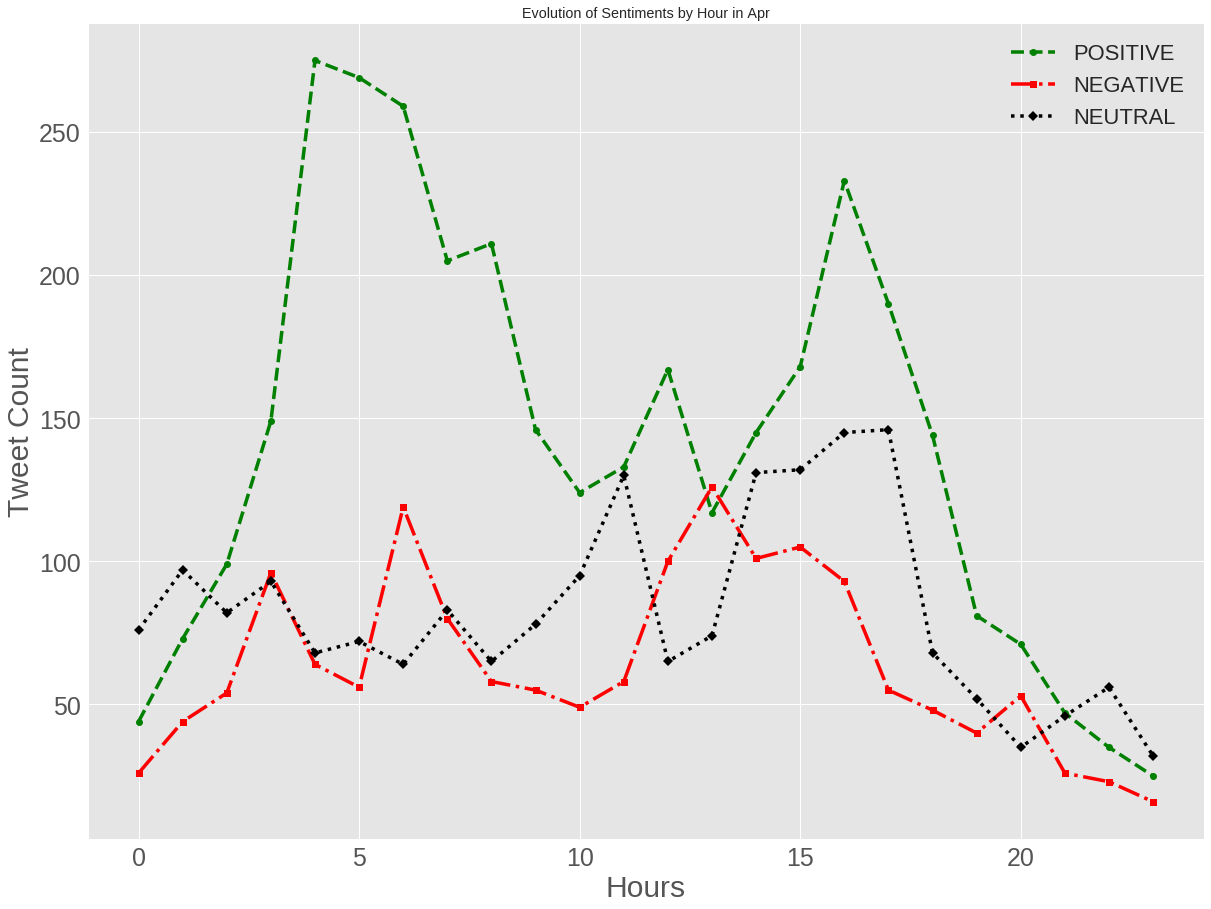

In [85]:
tp_hours
tneg_hours
tneu_hours
hours = [i for i in range(0,24)]
figure = matplotlib.pyplot.gcf()
figure.set_size_inches(20,15)
plt.title('Evolution of Sentiments by Hour in Apr')
plt.xlabel('Hours')
plt.ylabel('Tweet Count')
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
plt.rc('axes',labelsize=30)

p1, = plt.plot(hours,tp_hours,'go--',linewidth=3.5)
p2, = plt.plot(hours,tneg_hours,'rs-.',linewidth=3.5)
p3, = plt.plot(hours,tneu_hours,'kD:',linewidth=3.5)
#hours,tneg_hours,'bs-',hours,tneu_hours,'gs-')
plt.legend([p1,p2,p3],['POSITIVE','NEGATIVE','NEUTRAL'],loc = 1,prop = {'size':22})
plt.show()

In [42]:
#sentiment_type = pivot_tweets.index.get_level_values(0).unique()
#f, ax = plt.subplots(1, 1, figsize=(16, 12))
#plt.setp(ax, xticks=list(range(0,24)))

#a = ['r--','b-.','g^']
#i = 0
#for sentiment_type in sentiment_type:
    #split = pivot_tweets.xs(sentiment_type)
    #i+=1
    #split["count"].plot( legend=True,a[i], label='' + str(sentiment_type))
#plt.title('Evolution of sentiments by hour', bbox={'facecolor':'0.8', 'pad':0})     

**Part Bonus: Modelisation of retweetCount just with numerical features?**
---------------------------------------------------------

In [ ]:
from  sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from xgboost import plot_importance

tweets_num_mod = tweets[tweets.select_dtypes(exclude=['object']).columns.values]
target = tweets_num_mod['retweetCount']
tweets_num_mod.drop('retweetCount',inplace=True,axis=1)
tweets_num_mod.drop('Unnamed: 0',inplace=True,axis=1)

#Just simple  and single model
model_xg = XGBRegressor()
model_rf = RandomForestRegressor()
model_et = ExtraTreesRegressor()
model_gb = GradientBoostingRegressor()
model_dt = DecisionTreeRegressor()

In [ ]:
scores_xg = cross_val_score(model_xg, tweets_num_mod, target, cv=5,scoring='r2')
scores_rf = cross_val_score(model_rf, tweets_num_mod, target, cv=5,scoring='r2')
scores_dt = cross_val_score(model_dt, tweets_num_mod, target, cv=5,scoring='r2')
scores_et = cross_val_score(model_et, tweets_num_mod, target, cv=5,scoring='r2')
scores_gb = cross_val_score(model_gb, tweets_num_mod, target, cv=5,scoring='r2')

In [ ]:
print("Mean of scores for XG:", sum(scores_xg) / float(len(scores_xg)))
print("Mean of scores for RF:", sum(scores_rf) / float(len(scores_rf)))
print("Mean of scores for DT:", sum(scores_dt) / float(len(scores_dt)))
print("Mean of scores for ET:", sum(scores_et) / float(len(scores_et)))
print("Mean of scores for gb:", sum(scores_gb) / float(len(scores_et)))

In [ ]:
model_xg.fit(tweets_num_mod,target)
# plot feature importance for xgboost
plot_importance(model_xg)
plt.title('Feature importance', bbox={'facecolor':'0.8', 'pad':0})
plt.show()

**We can see that with ExtraTreesRegressor() we have 0.8XX with the metric R2. Very good score. It's possible to improve that with more work on the feature text...**